<a href="https://colab.research.google.com/github/tosittig/CASAIS/blob/main/Project_2_Sect_1_Assmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass-Image-Classification using CIFAR-100
##Project 2 - Section 1
### List of Tasks

1. Download the CIFAR-100 dataset from the Keras library. You can download it using the following command tf.keras.datasets.cifar100.load_data(). Note that this is a dataset different from CIFAR-10. See more information here.

1. Split the data into training and testing sets.
1. Normalise the pixel values and one-hot encode the labels.
1. Compile, train and evaluate the model. Please note that the selection of hyperparameters as well as the size of the neural network is your own decision.

### Preparation

Import Libraries required for the project:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Download CIFAR-100 dataset and split it into traing and testing sets



In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

Plot and look at some pictures

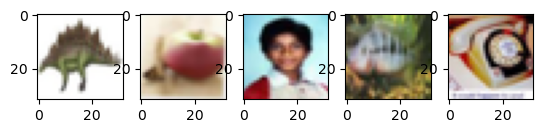

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 5, 1)
plt.imshow(X_train[1])
plt.subplot(1, 5, 2)
plt.imshow(X_train[2])
plt.subplot(1, 5, 3)
plt.imshow(X_train[3])
plt.subplot(1, 5, 4)
plt.imshow(X_train[4])
plt.subplot(1, 5, 5)
plt.imshow(X_train[5])

Understand if the categories correspond to the fine labels or coarse labels

In [9]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

How can I get the 100 fine labels from the CIFAR-100 Dataset?

##Normalise pixel values and one-hot encode the labels

###Pre-Process Images

Divide each pixel value in the datasets by 255.0. Since pixel values typically range from 0 to 255 (in the case of 8-bit images), dividing by 255.0 scales the pixel values to the range between 0 and 1. This process effectively normalizes the pixel values to the interval [0, 1].


In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

### One-hot encode Labels

Convert the training labels (y_train) and test labels (y_test) into categorical format using the to_categorical() function from tf.keras.utils module, representing labels in a categorical format, where each label is represented as a one-hot encoded vector.

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,)
y_test = tf.keras.utils.to_categorical(y_test)

##Define the model

Recognize the 100 classes in the CIFAR-100 Dataset (Fine Labels)

In [11]:
model = tf.keras.Sequential()
model.add(Conv2D(32,(3,3),input_shape = (32,32,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(4,4), padding ='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(4,4), padding ='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(4,4), padding ='same', activation='relu'))
model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(128, activation ='relu'))

model.add(Dense(100, activation ='softmax'))